In [1]:
!pip install ultralytics


In [2]:
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


In [3]:
model = YOLO('yolov8x.pt')
image_path = '/content/restaurant.jpg'
image = cv2.imread(image_path)

In [4]:
results = model(image)



0: 480x640 12 persons, 1 wine glass, 1 cup, 1 bowl, 6 chairs, 3 dining tables, 4959.9ms
Speed: 5.0ms preprocess, 4959.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


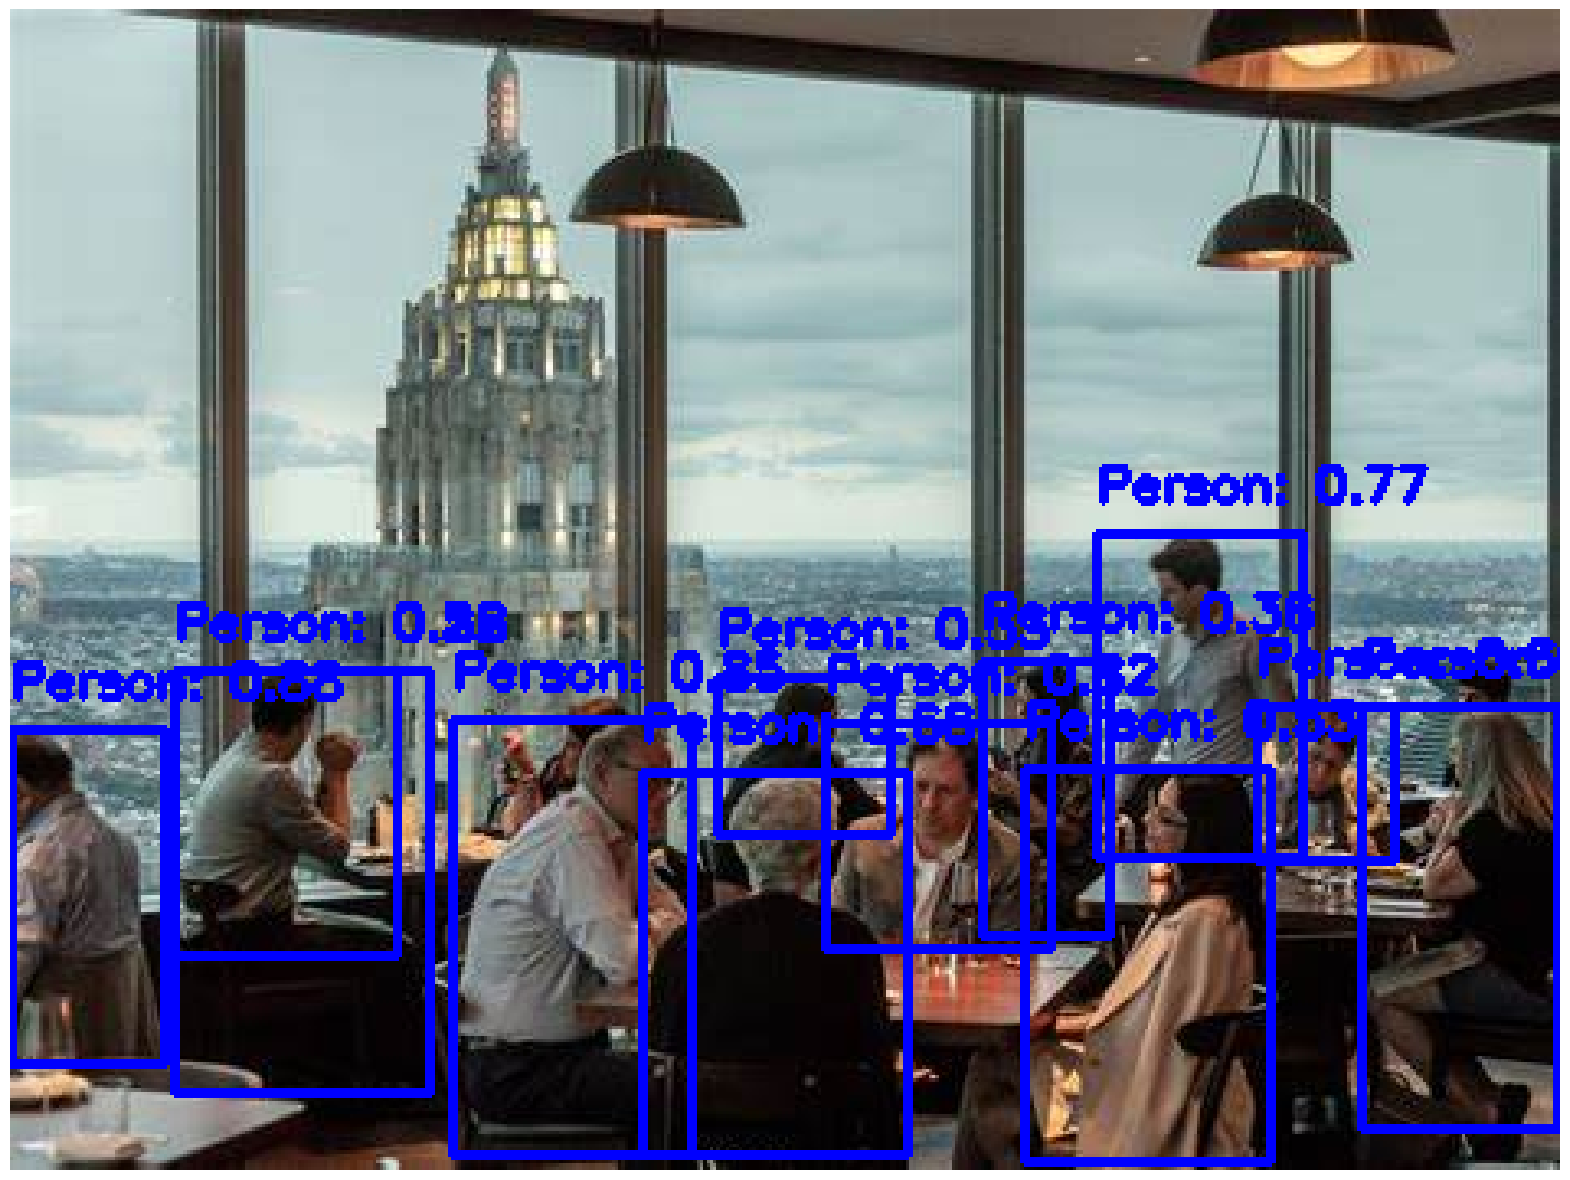

In [5]:
for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        conf = box.conf[0]
        cls = box.cls[0]
        if int(cls) == 0:
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
            cv2.putText(image, f'Person: {conf:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


0: 512x640 2 cars, 3894.6ms
Speed: 4.2ms preprocess, 3894.6ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


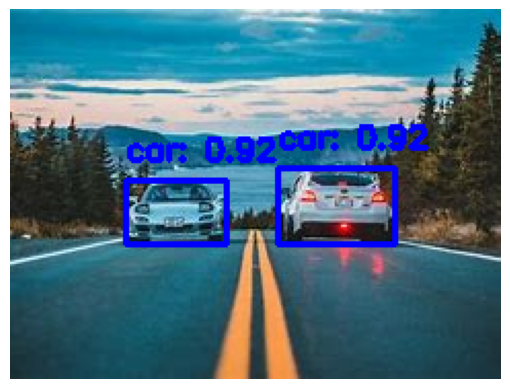

In [6]:

image_path = '/content/cars on road.jpg'
image = cv2.imread(image_path)
image_copy = image.copy()
results = model(image_copy)

vehicle_classes = [1, 2, 3, 5, 7]
for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        conf = box.conf[0]
        cls = box.cls[0]
        if int(cls) in vehicle_classes:
            label = result.names[int(cls)]
            cv2.rectangle(image_copy, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
            cv2.putText(image_copy, f'{label}: {conf:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

image_rgb = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [7]:
def detect_objects(image_path):
    model = YOLO('yolov8x.pt')
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image at path '{image_path}' not found.")

    results = model.predict(source=image, conf=0.25)

    for result in results:
        for box in result.boxes:
            try:
                x1, y1, x2, y2 = box.xyxy[0]
                label = int(box.cls)
                confidence = float(box.conf)
                cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
                cv2.putText(image, f'{label} {confidence:.2f}', (int(x1), int(y1) - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
            except ValueError as e:
                print(f"Error processing box coordinates: {e}")

    return image

In [8]:
def display_image(image, window_name='Image'):
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb)
  plt.axis('off')
  plt.show()


0: 480x640 12 persons, 1 wine glass, 1 cup, 1 bowl, 6 chairs, 3 dining tables, 9063.1ms
Speed: 4.2ms preprocess, 9063.1ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


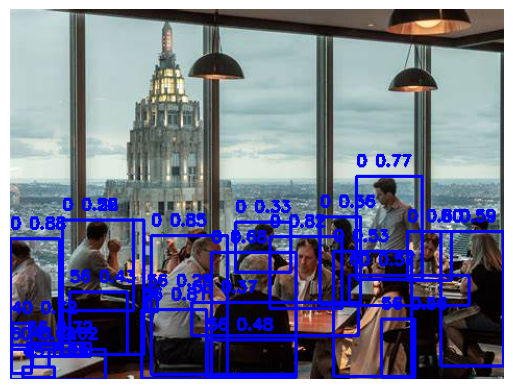

True

In [9]:
image_path = '/content/restaurant.jpg'
output_image = detect_objects(image_path)
display_image(output_image)
cv2.imwrite('output_image.jpg', output_image)